# Table of Contents
 <p><div class="lev1 toc-item"><a href="#MultiVariate-Linear-Regression" data-toc-modified-id="MultiVariate-Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MultiVariate Linear Regression</a></div><div class="lev1 toc-item"><a href="#Load-the-Data" data-toc-modified-id="Load-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the Data</a></div><div class="lev1 toc-item"><a href="#Data-Preparation-(train,-test)" data-toc-modified-id="Data-Preparation-(train,-test)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation (train, test)</a></div><div class="lev1 toc-item"><a href="#Manual-Implementation" data-toc-modified-id="Manual-Implementation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Manual Implementation</a></div><div class="lev2 toc-item"><a href="#Algorithm" data-toc-modified-id="Algorithm-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Algorithm</a></div><div class="lev2 toc-item"><a href="#Analysis-of-Convergence" data-toc-modified-id="Analysis-of-Convergence-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Analysis of Convergence</a></div><div class="lev1 toc-item"><a href="#Library-Implementations" data-toc-modified-id="Library-Implementations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Library Implementations</a></div><div class="lev2 toc-item"><a href="#Statsmodel" data-toc-modified-id="Statsmodel-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Statsmodel</a></div><div class="lev2 toc-item"><a href="#SKLearn" data-toc-modified-id="SKLearn-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>SKLearn</a></div><div class="lev1 toc-item"><a href="#SciPy" data-toc-modified-id="SciPy-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>SciPy</a></div>

# MultiVariate Linear Regression

See [UniVariate Linear Regression](01 - LinearRegression - UniVariate.ipynb) for introduction, data analysis and simpler version.

\begin{equation*}
Y = a_0 + a_{1} X_{1} + a_{2} X_{2} + ...
\end{equation*}



# Load the Data

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
df = pd.read_csv('./data/housing.data')

# Data Preparation (train, test)

In [15]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace, vstack

# Xs
X_ar = df["avg_rooms"]
X_pls = df["percent_lower_status"]
X = np.column_stack([X_ar,X_pls])
# Y
y = df["median_value"]

#number of training samples
m = y.size

#Add a column of ones to X (interception data)
it = ones(shape=(m, 3))
it[:, 1:] = X
X = it

#Create a mask for selecting randomly 20% of data
msk = np.random.rand(len(y)) < 0.2

# Split x-values for into train and test data
X_test = X[msk]
X = X[~msk]

# Split y-values for media_value into train and test data
y_test = y[msk].copy()
y = y[~msk].copy()

# Manual Implementation

## Algorithm

In [16]:
def compute_cost(X, y, theta):
    m = y.size
    predictions = X.dot(theta).flatten()
    sqErrors = (predictions - y) ** 2
    J = (1.0 / (2 * m)) * sqErrors.sum()
    return J

def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = zeros(shape=(num_iters, 1))
    #print("theta: " + str(theta))
    
    last_cost = compute_cost(X, y, theta)
    
    for i in range(num_iters):
        predictions = X.dot(theta).flatten()
        for j in range(theta.size):
            errors = (predictions - y) * X[:, j]        
            theta[j][0] = theta[j][0] - alpha * (1.0 / m) * errors.sum()
        cost = compute_cost(X, y, theta)
        if cost > last_cost:
            print("\tfound lowest cost before end of iterations")
            print("\titeration: " + str(i))
            print("\tbefore:" + str(last_cost))
            print("\tnow:" + str(cost))
            break
        J_history[i, 0] = cost
    return theta, J_history

In [19]:
from IPython.display import HTML, display

theta = {}
J_history = {}

alphas = ["0.001", "0.005", "0.01"]
iterations = ["100", "1000", "10000", "100000"]

table = '<table>'

for alpha in alphas:
    table += '<tr>'
    for iteration in iterations:
        if not iteration in theta:
            theta[iteration] = {}
            J_history[iteration] = {}
        theta[iteration][alpha] = zeros(shape=(3, 1))
        theta[iteration][alpha], J_history[iteration][alpha] = gradient_descent(X, y, theta[iteration][alpha], float(alpha), int(iteration))
        table += "<td>ar-" + str(iteration) + "-" + str(alpha) + " : y = " + str(theta[iteration][alpha][0]) + " + " + str(theta[iteration][alpha][1]) + "*X</td>"    
        print('.', end='')
    table += '</tr>'
    print('-')
    
table += '</table>'

display(HTML(table))

....-
....-
	found lowest cost before end of iterations
	iteration: 0
	before:299.62757499999975
	now:411.8725314364564
.	found lowest cost before end of iterations
	iteration: 0
	before:299.62757499999975
	now:411.8725314364564
.	found lowest cost before end of iterations
	iteration: 0
	before:299.62757499999975
	now:411.8725314364564
.	found lowest cost before end of iterations
	iteration: 0
	before:299.62757499999975
	now:411.8725314364564
.-


ar-100-0.001 : y = [ 0.4680597] + [ 3.39216087]*X,ar-1000-0.001 : y = [ 0.65764677] + [ 4.88164517]*X,ar-10000-0.001 : y = [ 0.5511223] + [ 4.89649266]*X,ar-100000-0.001 : y = [-0.24701671] + [ 5.00716825]*X
ar-100-0.005 : y = [ 0.66157527] + [ 4.86475527]*X,ar-1000-0.005 : y = [ 0.6095867] + [ 4.88838558]*X,ar-10000-0.005 : y = [ 0.14223191] + [ 4.95319229]*X,ar-100000-0.005 : y = [-1.24597306] + [ 5.14569059]*X
ar-100-0.01 : y = [ 0.225725] + [ 1.4627225]*X,ar-1000-0.01 : y = [ 0.225725] + [ 1.4627225]*X,ar-10000-0.01 : y = [ 0.225725] + [ 1.4627225]*X,ar-100000-0.01 : y = [ 0.225725] + [ 1.4627225]*X


## Analysis of Convergence

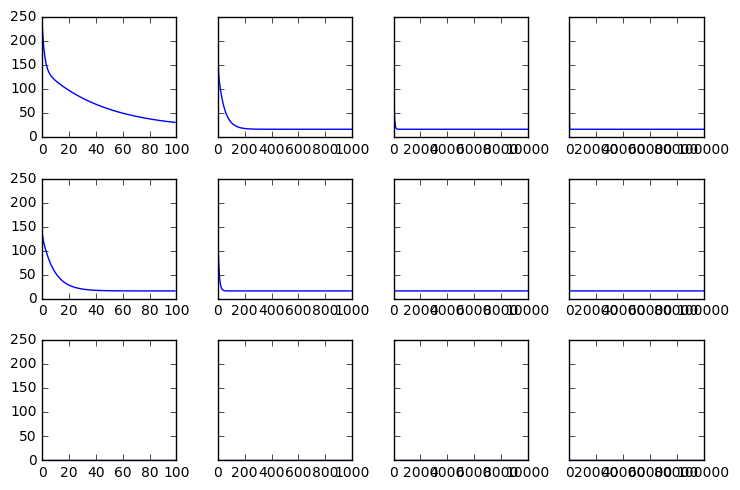

In [30]:
from numpy import arange

plt.close('all')
f, axarr = plt.subplots(len(alphas), len(iterations), sharey=True)
f.set_size_inches(7.5,5)

i = 0
j = 0
for alpha in alphas:
    for iteration in iterations:
        #print(iterations + "-" + alpha)
        #print(theta_pls[iterations][alpha])
        axarr[i, j].plot(arange(int(iteration)), J_history[iteration][alpha])
        j+=1
    i+=1
    j= 0

plt.tight_layout()
plt.show()

# Library Implementations


## Statsmodel

In [36]:
import statsmodels.api as sm

# create a linear model and fit it to the data
model = sm.OLS(y,X)
fit = model.fit()

print('Intercept a0: ', fit.params[0])
print('Coefficients a1, a2: ', fit.params)
print('P-Values: ', fit.pvalues)
print('R-Squared: ', fit.rsquared)
print('Conf. Interval: ', fit.conf_int())

print('')
# calculate MAE, MSE, RMSE
y_pred = fit.predict(X_test)
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Intercept a0:  -1.34207024631
Coefficients a1, a2:  const   -1.342070
x1       5.159016
x2      -0.674735
dtype: float64
P-Values:  const    7.125397e-01
x1       1.769508e-21
x2       1.304560e-33
dtype: float64
R-Squared:  0.636575695751
Conf. Interval:                0         1
const -8.497953  5.813813
x1     4.154260  6.163773
x2    -0.774524 -0.574947
MAE:  3.73411928077
MSE:  22.9127746586
RMSE:  4.78672901453


## SKLearn

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

ols = LinearRegression(fit_intercept=True)
model = ols.fit(X, y)

print('Intercept a0: ', model.intercept_)
print('Coefficients a1, a2: ', model.coef_)
print('R-Squared: ',model.score(X, y))

print('')
# calculate MAE, MSE, RMSE
y_pred = model.predict(X_test)
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Intercept a0:  -1.34207024631
Coefficients a1, a2:  [ 0.         5.1590161 -0.6747354]
R-Squared:  0.636575695751

MAE:  3.73411928077
MSE:  22.9127746586
RMSE:  4.78672901453


# SciPy